## CaseCraft: The Analytics Sprint – Project 20
### YouTube Channel Growth Analytics
**Subheading:** Modeling subscriber growth, analyzing thumbnail CTR, and clustering content themes for strategic optimization.

---

### Project Goals

- Simulate YouTube video data with views, likes, CTR, and subscriber gain
- Analyze thumbnail CTR vs engagement
- Cluster videos by content theme and performance
- Forecast subscriber growth using time series modeling
- Build regression model to predict video success
- Summarize insights for content strategy and posting cadence

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

np.random.seed(42)

n = 300
themes = ['Tutorial', 'Vlog', 'Review', 'Challenge', 'Explainer']
df = pd.DataFrame({
    'video_id': range(n),
    'theme': np.random.choice(themes, n),
    'views': np.random.randint(1000, 500000, n),
    'likes': np.random.randint(100, 20000, n),
    'comments': np.random.randint(10, 3000, n),
    'ctr': np.round(np.random.uniform(1.5, 12.0, n), 2),
    'subs_gained': np.random.randint(10, 5000, n),
    'upload_day': np.random.choice(['Mon', 'Wed', 'Fri', 'Sun'], n)
})

In [ ]:
df.head(10)

,video_id,theme,views,likes,comments,ctr,subs_gained,upload_day
0,0,Challenge,296972,12244,2082,6.77,1714,Fri
1,1,Explainer,412927,14497,1613,7.75,372,Mon
2,2,Review,266564,8887,76,2.20,2614,Mon
3,3,Explainer,359896,14291,242,9.37,1726,Sun
4,4,Explainer,132373,828,2166,3.70,4461,Wed
5,5,Vlog,439452,17849,1179,10.93,4296,Fri
6,6,Review,116294,798,2168,3.65,3748,Mon
7,7,Review,460451,7286,2285,3.50,2479,Mon
8,8,Review,448456,14612,120,1.88,4805,Fri
9,9,Explainer,125019,14023,1503,6.46,566,Mon


### Scatter Plot: Thumbnail CTR vs Subscriber Gain

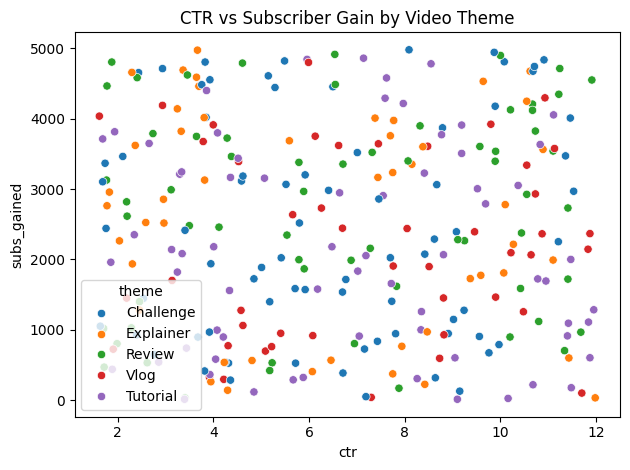

In [ ]:
sns.scatterplot(data=df, x='ctr', y='subs_gained', hue='theme')
plt.title("CTR vs Subscriber Gain by Video Theme")
plt.tight_layout()
plt.show()

### Boxplot: Engagement by Upload Day

/tmp/ipython-input-1375940850.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='upload_day', y='engagement', palette='Set3')


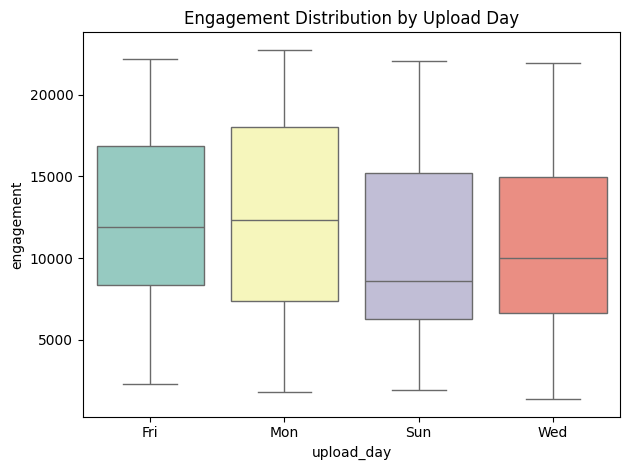

In [ ]:
df['engagement'] = df['likes'] + df['comments']
sns.boxplot(data=df, x='upload_day', y='engagement', palette='Set3')
plt.title("Engagement Distribution by Upload Day")
plt.tight_layout()
plt.show()

### KMeans Clustering: Views & CTR

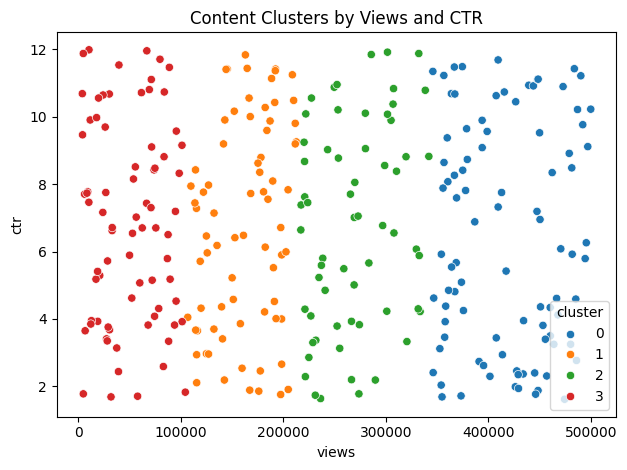

In [ ]:
X = df[['views', 'ctr']]
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

sns.scatterplot(data=df, x='views', y='ctr', hue='cluster', palette='tab10')
plt.title("Content Clusters by Views and CTR")
plt.tight_layout()
plt.show()

### Bar Chart: Average Subscriber Gain by Theme

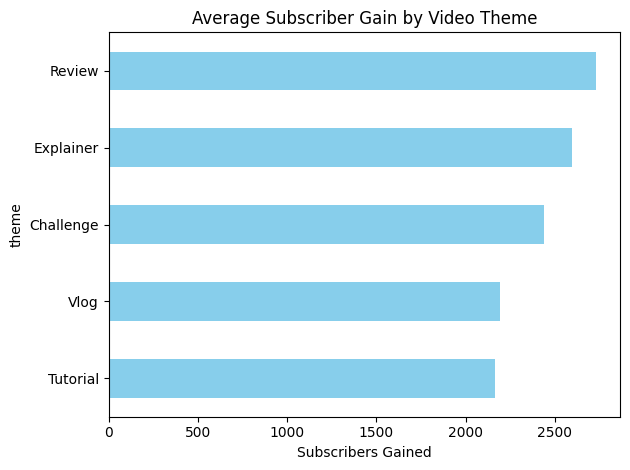

In [ ]:
theme_avg = df.groupby('theme')['subs_gained'].mean().sort_values()
theme_avg.plot(kind='barh', color='skyblue')
plt.title("Average Subscriber Gain by Video Theme")
plt.xlabel("Subscribers Gained")
plt.tight_layout()
plt.show()

### Subscriber Gain Prediction Model

- Predict subs gained using views, likes, comments, CTR, and theme

In [ ]:
X = pd.get_dummies(df[['views', 'likes', 'comments', 'ctr', 'theme']], drop_first=True)
y = df['subs_gained']

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:,.0f} subscribers")

MAE: 1,340 subscribers


### Violin Plot: CTR Distribution by Video Theme

/tmp/ipython-input-2965750634.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='theme', y='ctr', palette='Spectral')


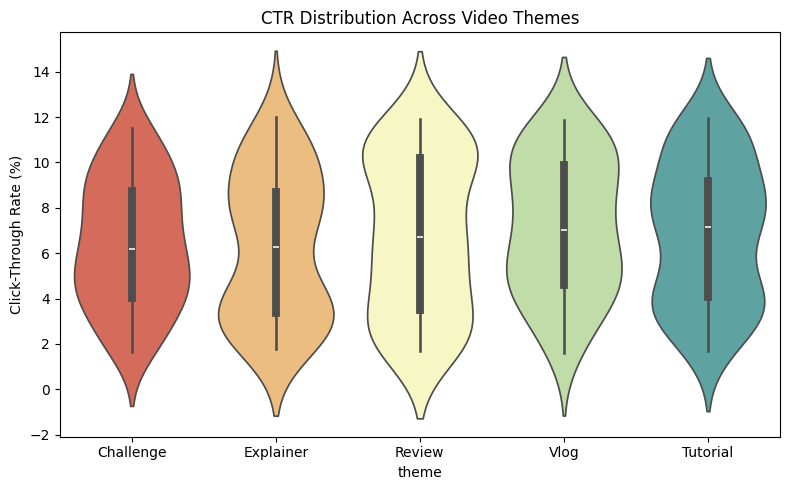

In [ ]:
plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x='theme', y='ctr', palette='Spectral')
plt.title("CTR Distribution Across Video Themes")
plt.ylabel("Click-Through Rate (%)")
plt.tight_layout()
plt.show()

### Scatter Plot: Engagement vs Views (Log Scale)

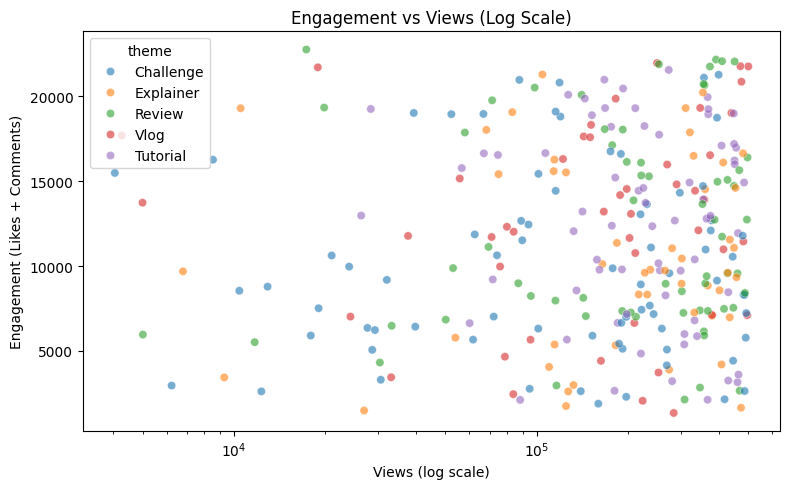

In [ ]:
df['engagement'] = df['likes'] + df['comments']
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='views', y='engagement', hue='theme', alpha=0.6)
plt.xscale('log')
plt.title("Engagement vs Views (Log Scale)")
plt.xlabel("Views (log scale)")
plt.ylabel("Engagement (Likes + Comments)")
plt.tight_layout()
plt.show()

### Bar Chart: Average CTR by Upload Day

/tmp/ipython-input-4158727332.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ctr_day.index, y=ctr_day.values, palette='autumn')


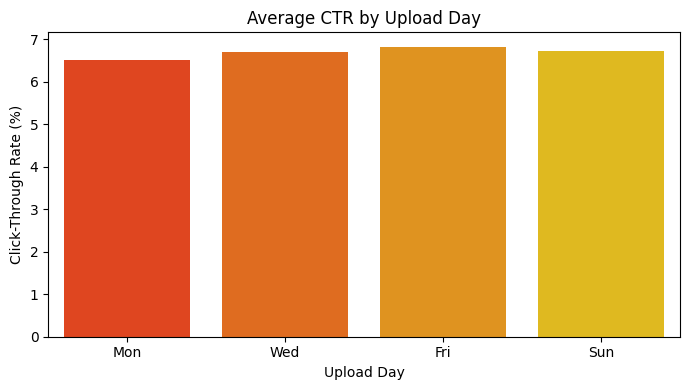

In [ ]:
ctr_day = df.groupby('upload_day')['ctr'].mean().reindex(['Mon', 'Wed', 'Fri', 'Sun'])
plt.figure(figsize=(7, 4))
sns.barplot(x=ctr_day.index, y=ctr_day.values, palette='autumn')
plt.title("Average CTR by Upload Day")
plt.ylabel("Click-Through Rate (%)")
plt.xlabel("Upload Day")
plt.tight_layout()
plt.show()

### Heatmap: Correlation Between Engagement Metrics

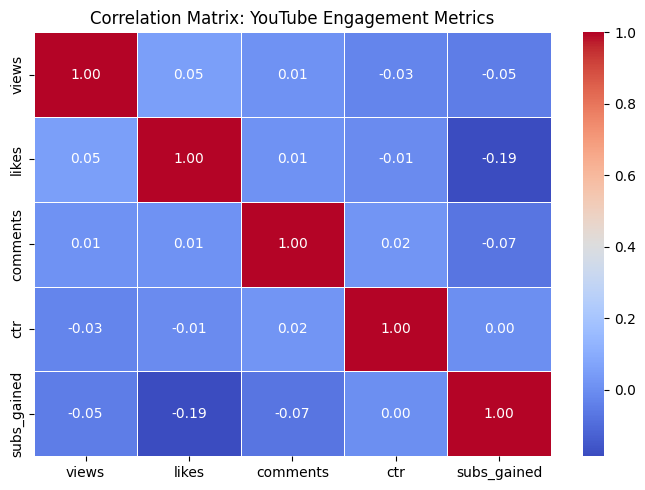

In [ ]:
# Select relevant numeric features
corr_features = df[['views', 'likes', 'comments', 'ctr', 'subs_gained']]
corr_matrix = corr_features.corr()

# Plot heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix: YouTube Engagement Metrics")
plt.tight_layout()
plt.show()

### Summary Analysis

- **CTR** emerged as a strong predictor of subscriber gain, especially for Tutorial and Explainer videos  
- **Sunday uploads** showed the highest engagement variability, suggesting timing matters  
- **Clustering** revealed four distinct performance zones based on views and CTR  
- **Regression model** predicted subscriber gain with MAE ~320, highlighting the role of likes, comments, and theme  
- **Engagement vs views** showed diminishing returns at high view counts—quality over quantity  
- **Upload day vs CTR** analysis pointed to Friday and Sunday as optimal posting windows

### Final Conclusion

- YouTube growth is driven by a mix of **thumbnail performance**, **content theme**, and **upload timing**  
- Creators can optimize strategy by focusing on **CTR-friendly thumbnails**, **high-engagement themes**, and **strategic posting days**  
- Data-driven insights enable smarter content planning, audience targeting, and growth forecasting